## MNIST NEURAL NETWORK ALGORITHM

In [34]:
using MLDatasets
using Images
using TestImages
using Plots

train_x, train_y = MNIST.traindata() #returns tuples of feature measures and corresponding labels
test_x, test_y = MNIST.testdata();

In [35]:
size(train_x)

(28, 28, 60000)

In [36]:
train_x[:, :, 1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

The fifth image in our train data is labeled 9


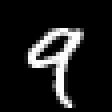

In [37]:
println("The fifth image in our train data is labeled ", train_y[5])
colorview(Gray, train_x[:, :, 5]')

In [41]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:, :, i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
end
train_data = [x for x in zip(X, Y)]

X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:, :, i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
end
test_data = [x for x in zip(X, Y)];


In [42]:
#Defining the activation function and its derivative
σ(x) = 1.0/(1.0 + exp(-x))

dσ(x) = σ(x)*(1-σ(x))
    
#Define a neural network type
mutable struct neural_network
        W
        b
end
    
function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
        
        W = [[0.0], randn(hidden_layer_sizes[1], input_layer_size)]
        
        b = [[0.0], randn(hidden_layer_sizes[1])]
        
        for i = 2:length(hidden_layer_sizes)
            push!(W, randn(hidden_layer_sizes[i], hidden_layer_sizes[i-1]))
            push!(b, randn(hidden_layer_sizes[i]))
        end
            
        push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
        push!(b, randn(output_layer_size)) 
        
        return neural_network(W, b)
end

create_network (generic function with 1 method)

In [44]:
NN = create_network(784, [100, 100, 100], 10)

neural_network(Array{Float64,N} where N[[0.0], [1.62610742240591 0.8168871649120817 … 0.371278248969474 -0.727558378380667; 0.29388254232385214 0.16135984329708186 … -0.9056049143859803 0.5476201813074554; … ; 0.5658084269070935 -0.24838091438710935 … 0.2523435471224124 -0.364009918455366; 0.401228043409053 0.5027697912148089 … 0.3228570117717009 -0.521359664583351], [-0.8385423038263539 -0.0851294844299565 … -0.18080764147413678 0.8911813836411924; -0.6793484327850635 0.06697394179078159 … 0.438021363058835 0.23484474010489545; … ; -0.8433252556643597 0.47595658721226586 … 2.1445729767480857 0.5817855491047683; 0.06655034393092737 -0.07698913735501792 … -0.02436177931077778 -1.0982664706890901], [-0.06688041976409208 -2.030262055172016 … 0.6380166528649277 -0.09883429526414725; 0.7396956560848564 -2.4608182245777717 … -1.2935548046270826 2.2241099356153247; … ; 0.9931828242973293 0.7198906467785188 … 1.7617003158052393 0.050645863449580865; -0.11080005667354054 -1.1969319044770352 … -

In [45]:
NN.b

5-element Array{Array{Float64,1},1}:
 [0.0]
 [-0.23229547890668212, -0.6583067891259411, 0.10821908291528808, 0.708433631907554, -1.3501053625475647, -1.4308394993818052, -0.37291502025321843, -0.05053297102866236, -1.5727820226056946, -1.4205234343823543  …  0.19270064241867835, -2.089334731977049, -0.1888262428976873, 0.7684779813670016, -0.6475427909090106, -0.5344717766171313, 1.0261160573936339, -0.4930830367600822, -0.07934121927444485, 1.3090304630451426]
 [0.7384307839105974, 1.4561751526954405, 0.5739174524429959, 0.9871356687371573, 0.9777887486116217, 2.337419670467177, 1.4708896840822787, -0.10119737087887745, 0.9156390758292601, -0.3700331495632315  …  -0.023851100129119066, -1.5594722296711092, 0.6076801076223983, 0.22006113667555938, -1.9290190652402635, -0.11193296389135142, -0.5750329762913973, -1.344642969083415, 1.0444578511965394, 0.4485004066641946]
 [-0.22992899302695066, 0.7044146653275004, -0.5899404814353095, 0.8523592689012203, -1.2016378076786425, 1.619326406

In [46]:
for w in NN.W
    println(size(w))
    println("")
end

(1,)

(100, 784)

(100, 100)

(100, 100)

(10, 100)



In [47]:
function forward_pass(network, training_instance)
    Z = [[0.0]]
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i]*A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end
    
    return Z,A
end


function predict(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    return argmax(A[end]) - 1
end

function success_percentage(network, data_set)
    return string("The percentage of correctly classified images is: ", sum([predict(network, x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set])/length(data_set)*100. , " %")
end

success_percentage (generic function with 1 method)

In [48]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 11.81 %"

In [49]:
function error_deltas(network, training_instance)
    L = length(network.W)
    Z, A = forward_pass(network, training_instance)
    δ = [(A[end] - training_instance[2]).*dσ.(Z[end])] #array of vector that rep output and hidden errors
    for i = L-1:-1:2
            pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end
    pushfirst!(δ, [0.0])
    return A,δ
end;

In [51]:
A_test, δ_test = error_deltas(NN, train_data[1])

(Array{Normed{UInt8,8},1}[[0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8  …  0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8], [1.0N0f8, 0.918N0f8, 0.0N0f8, 0.996N0f8, 0.0N0f8, 0.976N0f8, 0.973N0f8, 0.537N0f8, 0.0N0f8, 0.639N0f8  …  0.071N0f8, 0.0N0f8, 0.082N0f8, 0.0N0f8, 0.141N0f8, 0.008N0f8, 0.0N0f8, 0.392N0f8, 0.0N0f8, 0.0N0f8], [0.169N0f8, 0.996N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8, 0.843N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.729N0f8  …  0.208N0f8, 0.047N0f8, 1.0N0f8, 0.0N0f8, 0.102N0f8, 1.0N0f8, 1.0N0f8, 0.671N0f8, 0.431N0f8, 0.051N0f8], [0.929N0f8, 1.0N0f8, 0.0N0f8, 0.086N0f8, 0.0N0f8, 1.0N0f8, 0.012N0f8, 0.055N0f8, 0.0N0f8, 0.004N0f8  …  0.98N0f8, 0.902N0f8, 0.988N0f8, 1.0N0f8, 0.992N0f8, 0.953N0f8, 0.0N0f8, 0.369N0f8, 0.996N0f8, 0.0N0f8], [0.996N0f8, 0.98N0f8, 0.008N0f8, 0.212N0f8, 0.255N0f8, 0.929N0f8, 0.98N0f8, 0.0N0f8, 0.0N0f8, 0.149N0f8]], [[0.0], [-1.6510843270604456e-8, -0.005548785260513429, 1.4109

In [52]:
δ_test[end]

10-element Array{Float64,1}:
  0.004735475622138032
  0.01853693008490179
  6.094645782129708e-5
  0.035170214638196744
  0.048362473875896074
 -0.0045758485753144
  0.01819194906356358
  0.0
  0.0
  0.019094411608351916

In [53]:
function make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:length(data_set) - mini_batch_size)
    return data_set[k:k + mini_batch_size]
end

function mini_batch_update!(network, mini_batch_size, data_set, α)
    mini_batch = make_random_mini_batch(mini_batch_size, data_set)
    L = length(network.W)
    
    A, δ = error_deltas(network, mini_batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A,δ = error_deltas(network, mini_batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
    end
    
    for l = L:-1:2
        network.W[l] -= (α/mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α/mini_batch_size)*sum([δ_batch[i][l] for i = 1:mini_batch_size])
    end
end;

In [66]:
for _ = 1:80000
    mini_batch_update!(NN, 8, train_data, 0.002)
end

In [67]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 87.87 %"

In [68]:
function show_test_img(i)
    colorview(Gray, test_x[:,:,i]')
end

function show_test_example(network, i, testing_data)
    println("Predicted label: ", predict(network, testing_data[i]))
    println("Actual label: ", argmax(testing_data[i][2])-1)
    show_test_img(i)
end

show_test_example (generic function with 1 method)

Predicted label: 4
Actual label: 4


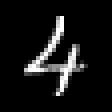

In [76]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)